In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('coronadata.csv')
df

,Location,Cases,Deaths,Recov
0,United States[f],33416364,600067,No data
1,India,27729247,322512,25178011
2,Brazil,16471600,461142,14869696
3,France[g],5657572,109387,No data
4,Turkey[h],5235978,47271,5094279
...,...,...,...,...
237,Samoa,4,0,2
238,Vanuatu,3,0,3
239,Kiribati,2,0,0
240,Federated States of Micronesia,1,0,1


In [3]:
df1 = df.replace('No data',np.nan)
df1

,Location,Cases,Deaths,Recov
0,United States[f],33416364,600067,NaN
1,India,27729247,322512,25178011
2,Brazil,16471600,461142,14869696
3,France[g],5657572,109387,NaN
4,Turkey[h],5235978,47271,5094279
...,...,...,...,...
237,Samoa,4,0,2
238,Vanuatu,3,0,3
239,Kiribati,2,0,0
240,Federated States of Micronesia,1,0,1


In [4]:
df2 = df1.fillna('0')

In [5]:
df2['Deaths'] = df2['Deaths'].replace(["60+"],'60')

In [6]:
print(df2.Deaths[182])

60


In [7]:
cols = ['Cases','Deaths','Recov']
df2[cols] = df2[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [8]:
df2

,Location,Cases,Deaths,Recov
0,United States[f],33416364,600067,0
1,India,27729247,322512,25178011
2,Brazil,16471600,461142,14869696
3,France[g],5657572,109387,0
4,Turkey[h],5235978,47271,5094279
...,...,...,...,...
237,Samoa,4,0,2
238,Vanuatu,3,0,3
239,Kiribati,2,0,0
240,Federated States of Micronesia,1,0,1


In [9]:
type(df2.Cases[0])

numpy.int64

In [10]:
df3 = df2.interpolate()
df3

,Location,Cases,Deaths,Recov
0,United States[f],33416364,600067,0
1,India,27729247,322512,25178011
2,Brazil,16471600,461142,14869696
3,France[g],5657572,109387,0
4,Turkey[h],5235978,47271,5094279
...,...,...,...,...
237,Samoa,4,0,2
238,Vanuatu,3,0,3
239,Kiribati,2,0,0
240,Federated States of Micronesia,1,0,1


In [11]:
df2 = df2.replace(0,np.nan)
df2

,Location,Cases,Deaths,Recov
0,United States[f],33416364.0,600067.0,NaN
1,India,27729247.0,322512.0,25178011.0
2,Brazil,16471600.0,461142.0,14869696.0
3,France[g],5657572.0,109387.0,NaN
4,Turkey[h],5235978.0,47271.0,5094279.0
...,...,...,...,...
237,Samoa,4.0,NaN,2.0
238,Vanuatu,3.0,NaN,3.0
239,Kiribati,2.0,NaN,NaN
240,Federated States of Micronesia,1.0,NaN,1.0


In [12]:
df3 = df2.interpolate()
df3

,Location,Cases,Deaths,Recov
0,United States[f],33416364.0,600067.0,NaN
1,India,27729247.0,322512.0,25178011.0
2,Brazil,16471600.0,461142.0,14869696.0
3,France[g],5657572.0,109387.0,9981987.5
4,Turkey[h],5235978.0,47271.0,5094279.0
...,...,...,...,...
237,Samoa,4.0,3.0,2.0
238,Vanuatu,3.0,3.0,3.0
239,Kiribati,2.0,3.0,2.0
240,Federated States of Micronesia,1.0,3.0,1.0


In [13]:
df4 = df3.fillna(method='bfill')
df4

,Location,Cases,Deaths,Recov
0,United States[f],33416364.0,600067.0,25178011.0
1,India,27729247.0,322512.0,25178011.0
2,Brazil,16471600.0,461142.0,14869696.0
3,France[g],5657572.0,109387.0,9981987.5
4,Turkey[h],5235978.0,47271.0,5094279.0
...,...,...,...,...
237,Samoa,4.0,3.0,2.0
238,Vanuatu,3.0,3.0,3.0
239,Kiribati,2.0,3.0,2.0
240,Federated States of Micronesia,1.0,3.0,1.0


In [18]:
df4 = df4.set_index('Location')
df4

,Cases,Deaths,Recov
Location,,,
United States[f],33416364.0,600067.0,25178011.0
India,27729247.0,322512.0,25178011.0
Brazil,16471600.0,461142.0,14869696.0
France[g],5657572.0,109387.0,9981987.5
Turkey[h],5235978.0,47271.0,5094279.0
...,...,...,...
Samoa,4.0,3.0,2.0
Vanuatu,3.0,3.0,3.0
Kiribati,2.0,3.0,2.0


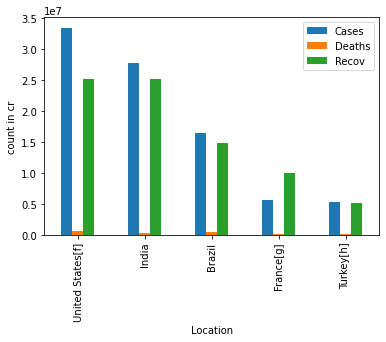

In [24]:
from matplotlib import pyplot as plt
df4[0:5].plot(kind='bar')
plt.ylabel('count in cr')
plt.legend()
plt.show()